In [21]:
import networkx as nx
import matplotlib.pyplot as plt

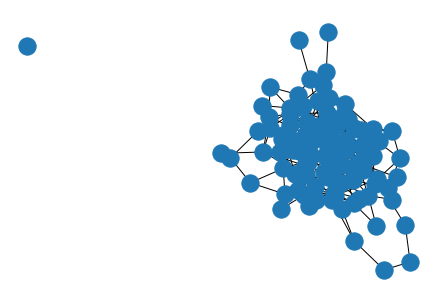

In [2]:
# network generators 1 (random graphs)
er = nx.erdos_renyi_graph(100, 0.05)
nx.draw(er)

In [8]:
def plot_degree_distribution(G):
    hist = nx.degree_histogram(G)
        
    plt.plot(range(0, len(hist)), hist, ".")
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("#Nodes")
    plt.show()

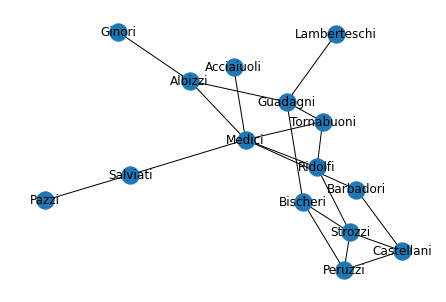

In [7]:
ff = nx.florentine_families_graph()
nx.draw(ff, with_labels=True)

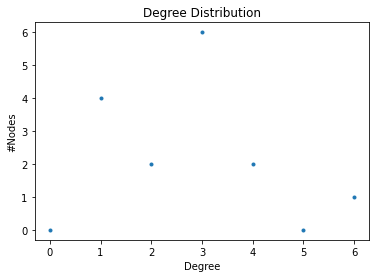

In [9]:
plot_degree_distribution(ff)

In [33]:
gg = nx.fast_gnp_random_graph(50, 0.07)

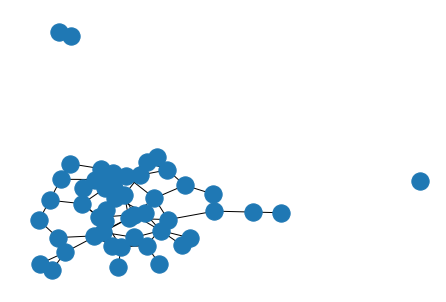

In [34]:
nx.draw(gg)

# trying out exercise from book 

`` 1.Consider the network in http://www.networkatlas.eu/exercises/ 13/1/data.txt. Generate an Erdo ̋s-Rényi graph with the same number of nodes and edges. Plot both networks’ degree CCDFs, in log-log scale. Discuss the salient differences between these distributions. ``

In [35]:
import pandas as pd
import numpy as np
import powerlaw

In [19]:
data = pd.read_csv('https://www.networkatlas.eu/exercises/13/1/data.txt', delimiter=' ', header = None)
# adding column names
data.columns = ['in', 'out']

In [20]:
data.head()

,in,out
0,2,1
1,3,1
2,3,2
3,4,1
4,4,3


In [22]:
G = nx.from_pandas_edgelist(data, 'in', 'out')

In [26]:
def graph_basic(G):
    print("Number of edges: ", G.number_of_edges())
    print("Number of nodes: ", G.number_of_nodes())

In [27]:
graph_basic(G)

Number of edges:  16631
Number of nodes:  2426


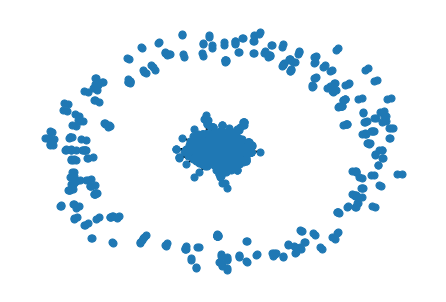

In [29]:
seed = 51
pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
# nx.draw(G, pos=pos)
nx.draw(G, node_size=50, width=2, pos=pos)

##  Erdo ̋s-Rényi graph
[networkx doc](https://networkx.org/documentation/stable/auto_examples/graph/plot_erdos_renyi.html?highlight=erdo%20s%20r%C3%A9nyi%20graph)

In [30]:
nodes = G.number_of_nodes()
edges = G.number_of_edges()

eg = nx.gnm_random_graph(nodes, edges, seed=seed)

In [31]:
graph_basic(eg)

Number of edges:  16631
Number of nodes:  2426


In [36]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()

Calculating best minimal value for power law fit
/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/var/folders/cr/cspt5tz93w7cqfslq2qjbg_c0000gn/T/ipykernel_4509/717240674.py:14: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((min(degree), max(degree)))


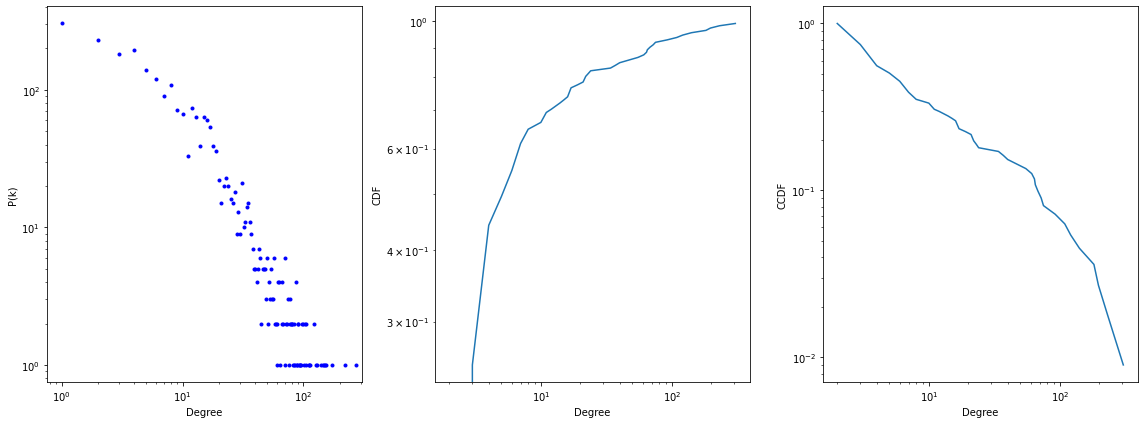

In [37]:
plot_dist(G)

Calculating best minimal value for power law fit
/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/var/folders/cr/cspt5tz93w7cqfslq2qjbg_c0000gn/T/ipykernel_4509/717240674.py:14: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((min(degree), max(degree)))


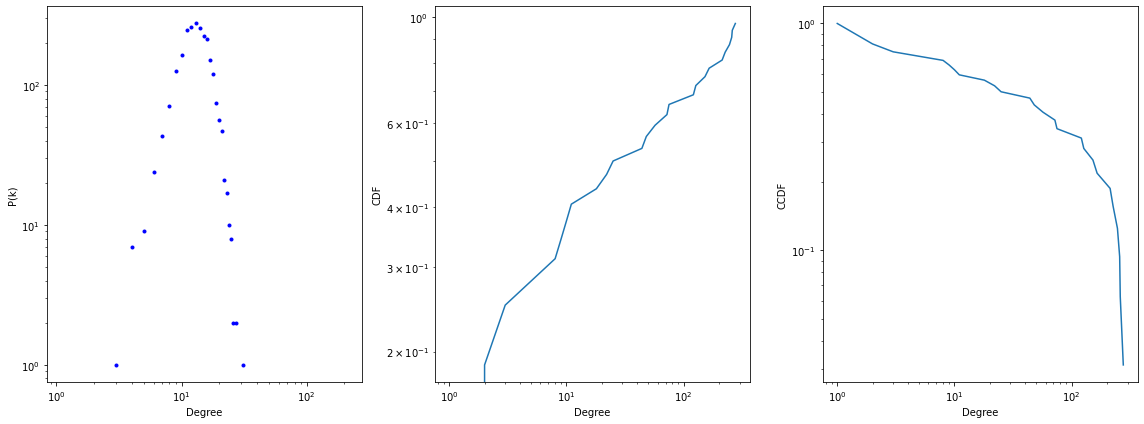

In [38]:
plot_dist(eg)